In [1]:
from fourier_analysis import FourierAnalysis, window_data
import matplotlib.pyplot as plt
import yt

In [2]:
ds = yt.load_sample("TNGHalo/halo_59.hdf5")

yt : [INFO     ] 2025-10-07 18:35:59,528 Sample dataset found in '/Users/jzuhone/Data/yt/test_outputs/TNGHalo/halo_59.hdf5'
yt : [INFO     ] 2025-10-07 18:35:59,761 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2025-10-07 18:35:59,789 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-10-07 18:35:59,789 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-10-07 18:35:59,790 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-10-07 18:35:59,790 Parameters: domain_right_edge         = [205000. 205000. 205000.]
yt : [INFO     ] 2025-10-07 18:35:59,790 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-10-07 18:35:59,791 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2025-10-07 18:35:59,791 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2025-10-07 18:35:59,791 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2025-10-07 18:35:59,79

In [3]:
_, c = ds.find_min(("PartType1", "Potential"))

yt : [INFO     ] 2025-10-07 18:35:59,838 Allocating for 1.011e+07 particles
Loading particle index: 100%|██████████| 22/22 [00:00<00:00, 5437.52it/s]
yt : [INFO     ] 2025-10-07 18:36:00,412 min value is -4.29272e+06 at 48669.3106614936987171 53984.2416651064049802 62114.8789240781261469


yt : [INFO     ] 2025-10-07 18:36:00,670 xlim = 47991.911193 49346.710130
yt : [INFO     ] 2025-10-07 18:36:00,670 ylim = 53306.842196 54661.641134
yt : [INFO     ] 2025-10-07 18:36:00,671 xlim = 47991.911193 49346.710130
yt : [INFO     ] 2025-10-07 18:36:00,671 ylim = 53306.842196 54661.641134
yt : [INFO     ] 2025-10-07 18:36:00,673 Making a fixed resolution buffer of (('gas', 'kT')) 800 by 800
yt : [INFO     ] 2025-10-07 18:36:01,508 Making a fixed resolution buffer of (('gas', 'magnetic_field_strength')) 800 by 800
yt : [INFO     ] 2025-10-07 18:36:02,306 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



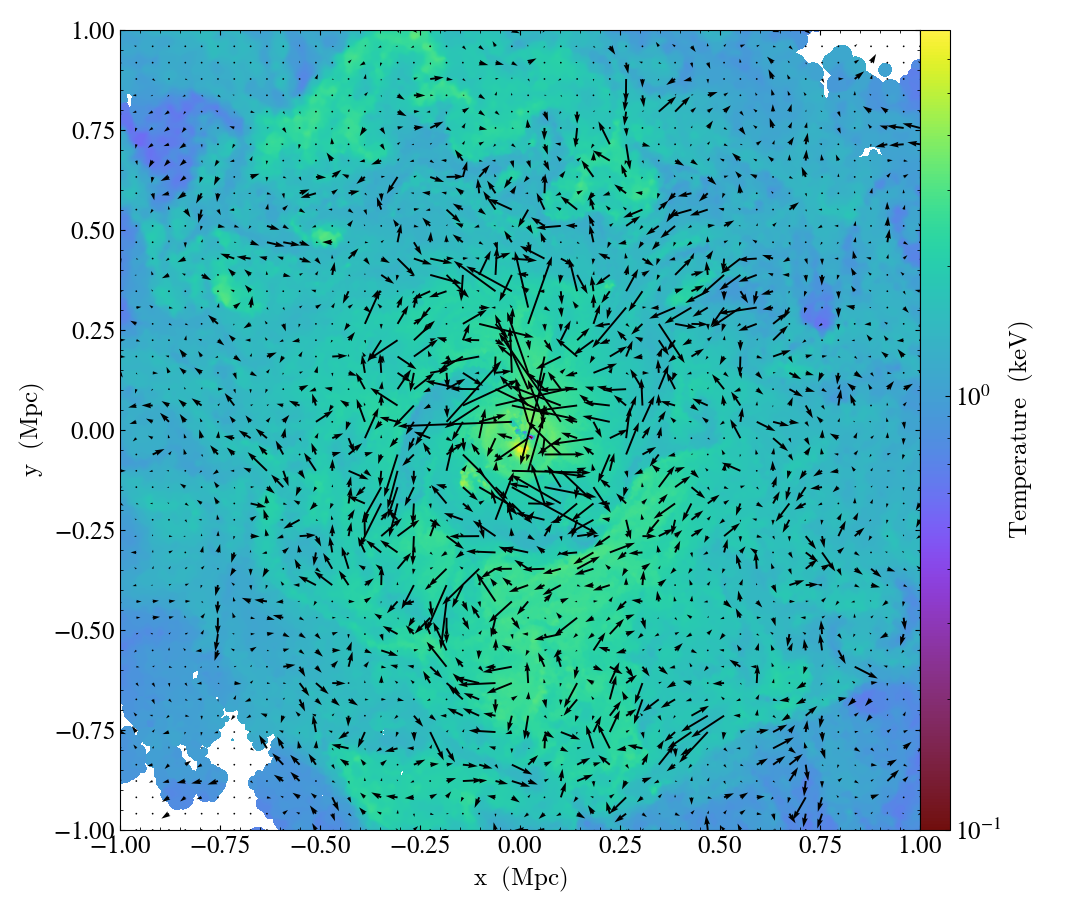
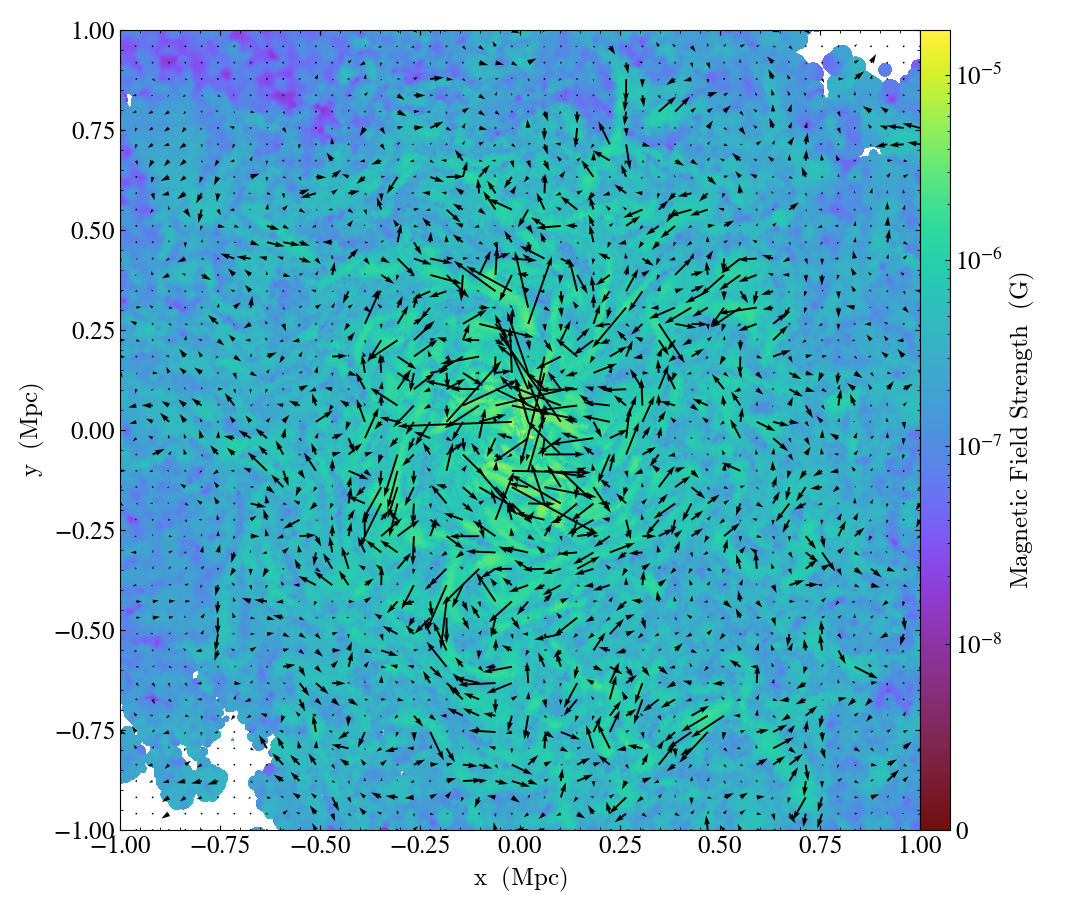
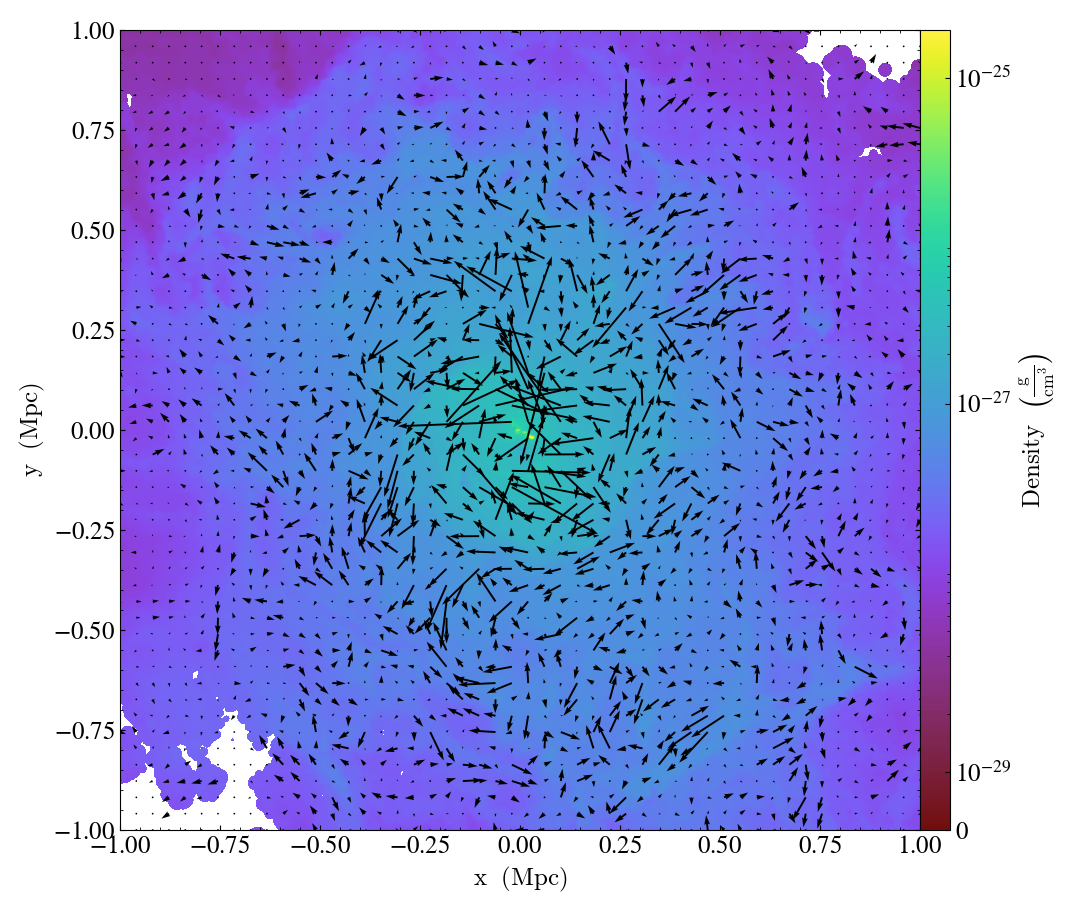

In [4]:
slc = yt.SlicePlot(
    ds,
    "z",
    [("gas", "density"), ("gas", "kT"), ("gas", "magnetic_field_strength")],
    center=c,
    width=(2.0, "Mpc"),
)
slc.annotate_magnetic_field()
slc.set_zlim(("gas", "kT"), 0.1, 7.0)
slc.show()

In [5]:
# This is the width of the grid on a side (here in kpc, but could be anything)
W = ds.arr([1000.0] * 3, "kpc")
ddims = [256] * 3

In [6]:
grid = ds.r[
    c[0] - W[0] / 2 : c[0] + W[0] / 2 : ddims[0] * 1j,
    c[1] - W[1] / 2 : c[1] + W[1] / 2 : ddims[1] * 1j,
    c[2] - W[2] / 2 : c[2] + W[2] / 2 : ddims[2] * 1j,
]

In [7]:
# This is a class I wrote to simplify stuff
fa = FourierAnalysis(W, ddims)

In [8]:
bx = grid[("gas", "magnetic_field_x")].to_value("uG")

Interpolating SPH field ('PartType0', 'particle_magnetic_field_x'): 3100000it [00:03, 868952.92it/s] 


In [9]:
# here I am applying a hanning window to the data to
# fix the fact that this is a non-periodic box and avoid aliasing
window_data(bx, filter_function="tukey")

In [10]:
# Get the power spectrum of each spatial component
nbins = 60  # Number of bins for the power spectrum, it will
# use the min-max wavenumbers as boundaries
k, Pk = fa.make_powerspec(bx, nbins)

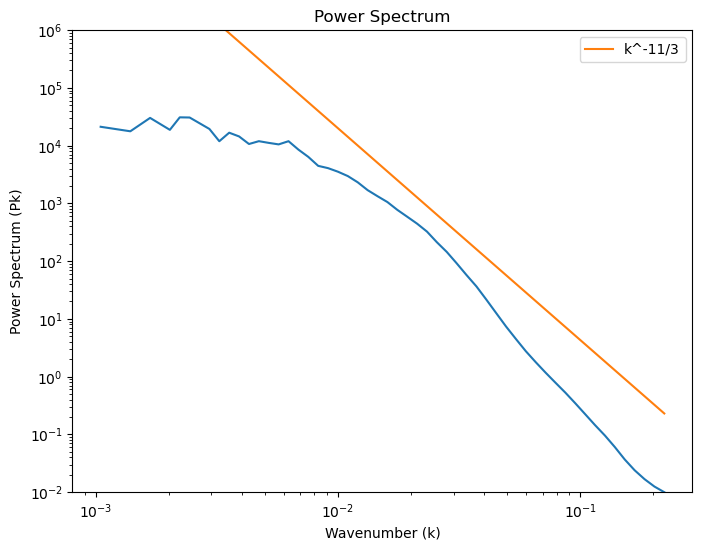

In [ ]:
# Now let's plot both the magnetic field power spectrum
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.loglog(k, Pk)
ax.loglog(k, 2e4*(k/1.0e-2)**(-11./3.), label="k^-11/3")
ax.set_xlabel("Wavenumber (k)")
ax.set_ylabel("Power Spectrum (Pk)")
ax.set_title("Power Spectrum")
ax.set_ylim(1.0e-2, 1.0e6)
ax.legend()